Challenge: As a business we have new customers who we want to estimate how much they volume they would generate. There are two main ways we can get this information. Asking the customoer directly or using the characteristics and assinging them a volume amount based on similar customers actuals'. Below we use Regresssion to help us predict this for any combo of the features of our customers might have. 

Future Improvements: One way to improve this model would be to fine tune the model to have a greater R-sqauared value and a lower MSE. We could do this by feature engineering and bringing in additional data to determine if there are other features that correlate with the expected volume of a customer. 

1. data prep

In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/barisohussein/Downloads/processing_mock_data.csv')

data

,ecg,segment,size,denomination,volume,month_processed,month_booked
0,7628250706,ENT,500-1100,Non_Catholic,12955832,Jan-21,Sep-21
1,5467939683,MM,100-200,Catholic,8820509,Feb-21,Aug-20
2,2492486227,SME,100-200,Non_Catholic,4930992,Mar-21,May-22
3,473528211,ENT,100-200,Non_Catholic,14690819,Apr-21,Jun-22
4,5677476956,MM,200-300,Non_Catholic,5891137,May-21,Jul-21
5,9253905781,SME,200-300,Non_Catholic,3930443,Jun-21,Sep-22
6,8442780187,ENT,200-300,Non_Catholic,13911844,Jul-21,Oct-20
7,3038557440,MM,500-1100,Catholic,8253354,Aug-21,Feb-22
8,5027496984,SME,100-200,Non_Catholic,133675,Sep-21,Mar-23
9,8546554020,ENT,100-200,Catholic,14185904,Oct-21,Oct-22


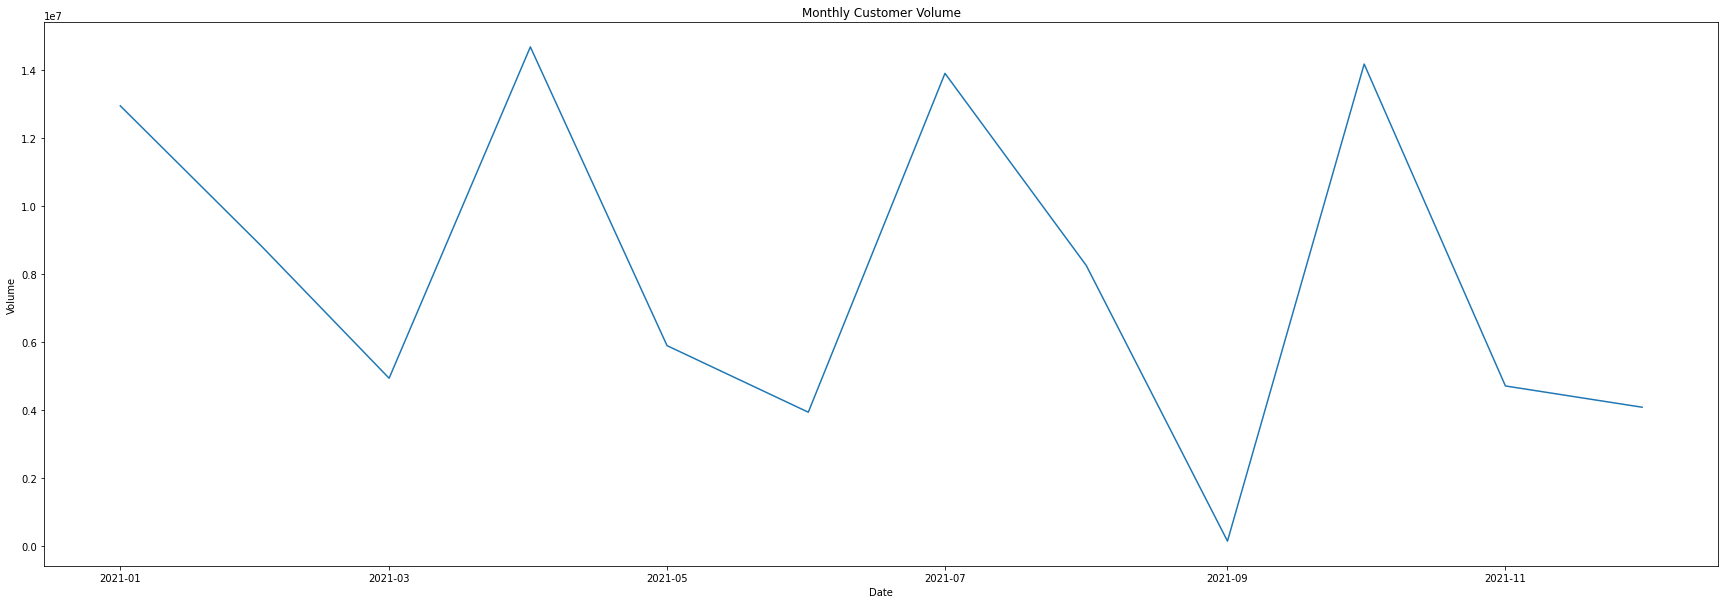

In [39]:

#visualize the data
plt.figure(figsize=(30,10))
plt.plot(data['month_processed'],data['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Monthly Customer Volume')
plt.show()

In [25]:
# Convert date columns to datetime objects
data['month_processed'] = pd.to_datetime(data['month_processed'], format='%b-%y')
data['month_booked'] = pd.to_datetime(data['month_booked'], format='%b-%y')

data['booked_month'] = data['month_booked'].dt.month
data['booked_year'] = data['month_booked'].dt.year

# Encode categorical variables (segment and denomination) using one-hot encoding
data = pd.get_dummies(data, columns=['segment', 'denomination','size'], drop_first=False)

# Split the data into features (X) and target (y)
X = data[['segment_SME', 'segment_ENT', 'segment_MM','booked_month', 'denomination_Catholic', 'size_100-200',	'size_200-300',	'size_500-1100']]
y = data['volume']

In [37]:
train_data = X_train.join(y_train)

<AxesSubplot:>

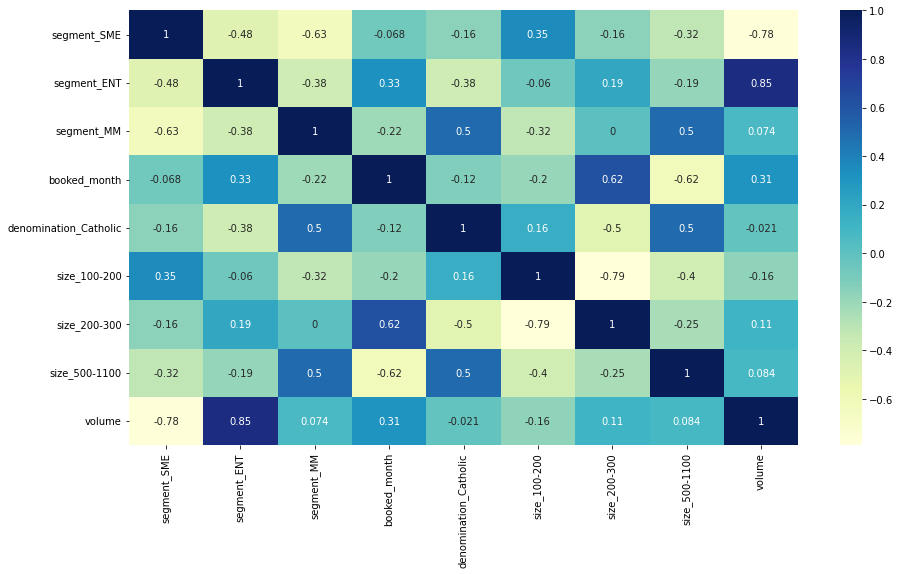

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap ='YlGnBu')

2. Model training

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
# from sklearn.linear_model import LinearRegression Alternative option
 
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

3. Model Eval

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4081636821379.4453
R-squared: 0.7697261035811684


4. Create series for new customer characteristics 

In [46]:
# Replace the values below with the characteristics of the new customer
new_customer = {
    'segment_SME': 1,  # 1 if the segment is SME, 0 otherwise
    'segment_ENT': 0,  # 1 if the segment is ENT, 0 otherwise
    'segment_MM': 0,  # 1 if the segment is MM, 0 otherwise
        'booked_month': 4, # Replace with the month booked,
    'denomination_Catholic': 1,  # 1 if the denomination is Catholic, 0 otherwise
'size_100-200': 0,
'size_200-300': 0,
'size_500-1100': 1

}

# Create a DataFrame for the new customer
new_customer_df = pd.DataFrame(new_customer, index=[0])

# Make predictions for the new customer
predicted_volume = model.predict(new_customer_df)

print(f"Predicted Volume for New Customer: {predicted_volume[0]}")


Predicted Volume for New Customer: 4672163.362919193


In [57]:
import itertools

# Define the range of values for each feature
segment_values = [0, 1]  # 0 for False, 1 for True
denomination_values = [0, 1]  # 0 for Non-Catholic, 1 for Catholic
size_values = [0, 1]  # 0 for 100-200, 1 for 200-300, 2 for 500-1100
booked_month_values = list(range(1, 13))  # 1 to 12 for months

# Generate all possible combinations of feature values
scenarios = list(itertools.product(segment_values, denomination_values, size_values, booked_month_values))

# Create a list of dictionaries to represent each scenario
new_customers = []
for scenario in scenarios:
    new_customer = {
        'segment_SME': scenario[0],
        'segment_ENT': not scenario[0],  # Invert the value for the other segments
        'segment_MM': not scenario[0],
        'booked_month': scenario[3],
        'denomination_Catholic': scenario[1],
        'size_100-200': scenario[2] == 0,
        'size_200-300': scenario[2] == 1,
        'size_500-1100': scenario[2] == 2
    }
    new_customers.append(new_customer)

# Print the first few generated scenarios
for i, customer in enumerate(new_customers[:10]):  # Print the first 10 scenarios as an example
    print(f"Scenario {i + 1}: {customer}")


Scenario 1: {'segment_SME': 0, 'segment_ENT': True, 'segment_MM': True, 'booked_month': 1, 'denomination_Catholic': 0, 'size_100-200': True, 'size_200-300': False, 'size_500-1100': False}
Scenario 2: {'segment_SME': 0, 'segment_ENT': True, 'segment_MM': True, 'booked_month': 2, 'denomination_Catholic': 0, 'size_100-200': True, 'size_200-300': False, 'size_500-1100': False}
Scenario 3: {'segment_SME': 0, 'segment_ENT': True, 'segment_MM': True, 'booked_month': 3, 'denomination_Catholic': 0, 'size_100-200': True, 'size_200-300': False, 'size_500-1100': False}
Scenario 4: {'segment_SME': 0, 'segment_ENT': True, 'segment_MM': True, 'booked_month': 4, 'denomination_Catholic': 0, 'size_100-200': True, 'size_200-300': False, 'size_500-1100': False}
Scenario 5: {'segment_SME': 0, 'segment_ENT': True, 'segment_MM': True, 'booked_month': 5, 'denomination_Catholic': 0, 'size_100-200': True, 'size_200-300': False, 'size_500-1100': False}
Scenario 6: {'segment_SME': 0, 'segment_ENT': True, 'segment

[{'segment_SME': 0,
  'segment_ENT': True,
  'segment_MM': True,
  'booked_month': 1,
  'denomination_Catholic': 0,
  'size_100-200': True,
  'size_200-300': False,
  'size_500-1100': False},
 {'segment_SME': 0,
  'segment_ENT': True,
  'segment_MM': True,
  'booked_month': 2,
  'denomination_Catholic': 0,
  'size_100-200': True,
  'size_200-300': False,
  'size_500-1100': False},
 {'segment_SME': 0,
  'segment_ENT': True,
  'segment_MM': True,
  'booked_month': 3,
  'denomination_Catholic': 0,
  'size_100-200': True,
  'size_200-300': False,
  'size_500-1100': False},
 {'segment_SME': 0,
  'segment_ENT': True,
  'segment_MM': True,
  'booked_month': 4,
  'denomination_Catholic': 0,
  'size_100-200': True,
  'size_200-300': False,
  'size_500-1100': False},
 {'segment_SME': 0,
  'segment_ENT': True,
  'segment_MM': True,
  'booked_month': 5,
  'denomination_Catholic': 0,
  'size_100-200': True,
  'size_200-300': False,
  'size_500-1100': False},
 {'segment_SME': 0,
  'segment_ENT': Tru

5. Export data

In [58]:

# Create a DataFrame for the new customer scenarios
new_customers_df = pd.DataFrame(new_customers)

# Make predictions for the new customer scenarios
predicted_volumes = model.predict(new_customers_df)

# Create a new DataFrame to store the results
results_df = pd.DataFrame({'Predicted_Volume': predicted_volumes})

# Save the results to a CSV file
#results_df.to_csv('predicted_volumes.csv', index=False)

In [59]:
# Save the results to a CSV file

new_customers_df = new_customers_df.join(results_df)
new_customers_df.to_csv('/Users/barisohussein/Downloads/mock_predicted_volumes.csv', index=False)